In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt

In [2]:
path = "C:/Users/blk/OneDrive/Documenten/GitHub/ML-Final/AppliedML_Assign.01/Assignment2/Data"
os.chdir(path)
os.getcwd()

'C:\\Users\\blk\\OneDrive\\Documenten\\GitHub\\ML-Final\\AppliedML_Assign.01\\Assignment2\\Data'

In [3]:
data = pd.read_csv('A2_data_clean.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
print(data)
print(data.isna().sum())

           Date  Temperature  Fuel_Price         CPI  Unemployment  IsHoliday   
0    2010-02-05    34.037333    2.717844  167.730885      8.619311          0  \
1    2010-02-12    34.151333    2.694022  167.825608      8.619311          1   
2    2010-02-19    37.719778    2.672067  167.871686      8.619311          0   
3    2010-02-26    39.243556    2.683933  167.909657      8.619311          0   
4    2010-03-05    42.917333    2.731200  167.947628      8.619311          0   
..          ...          ...         ...         ...           ...        ...   
177  2013-06-28    79.871111    3.629400  177.990680      6.719244          0   
178  2013-07-05    79.655778    3.583533  177.990680      6.719244          0   
179  2013-07-12    80.798667    3.568111  177.990680      6.719244          0   
180  2013-07-19    79.268667    3.683444  177.990680      6.719244          0   
181  2013-07-26    78.037333    3.734444  177.990680      6.719244          0   

        MarkDown1   MarkDow

Steps to take:
- normalize data
- create train test split
- setup model structure 
- train model
- make predictions

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,MarkDown1,MarkDown3,MarkDown4,MarkDown5,Week,Weekly_Sales
0,2010-02-05,34.037333,2.717844,167.730885,8.619311,0,24089.612333,199.325256,24742.654163,4185.380333,5,49.0
1,2010-02-12,34.151333,2.694022,167.825608,8.619311,1,29880.900556,200.033519,19646.377135,5089.147556,6,48.0
2,2010-02-19,37.719778,2.672067,167.871686,8.619311,0,12536.748111,62.672919,7040.314331,5646.276000,7,48.0
3,2010-02-26,39.243556,2.683933,167.909657,8.619311,0,8504.312444,24.218426,2881.930628,4458.685000,8,43.0
4,2010-03-05,42.917333,2.731200,167.947628,8.619311,0,11293.039000,21.398405,6237.467212,2911.005778,9,46.0


In [108]:
# #create new column
# data["Month"] = data.Date.dt.month
# data["Year"] = data.Date.dt.year
# data["WeekofYear"] = data.Week

# #create dummies out of categorical column
# columns_to_encode = ["Month", "Year", "WeekofYear"]
# data = pd.get_dummies(data, columns=columns_to_encode)



In [7]:
print(
    data.head()
)

        Date  Temperature  Fuel_Price         CPI  Unemployment  IsHoliday   
0 2010-02-05    34.037333    2.717844  167.730885      8.619311          0  \
1 2010-02-12    34.151333    2.694022  167.825608      8.619311          1   
2 2010-02-19    37.719778    2.672067  167.871686      8.619311          0   
3 2010-02-26    39.243556    2.683933  167.909657      8.619311          0   
4 2010-03-05    42.917333    2.731200  167.947628      8.619311          0   

      MarkDown1   MarkDown3     MarkDown4    MarkDown5  Week  Weekly_Sales  
0  24089.612333  199.325256  24742.654163  4185.380333     5          49.0  
1  29880.900556  200.033519  19646.377135  5089.147556     6          48.0  
2  12536.748111   62.672919   7040.314331  5646.276000     7          48.0  
3   8504.312444   24.218426   2881.930628  4458.685000     8          43.0  
4  11293.039000   21.398405   6237.467212  2911.005778     9          46.0  


In [8]:
data.columns

Index(['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday',
       'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Week',
       'Weekly_Sales'],
      dtype='object')

In [9]:
data.drop(['Date'],axis=1,inplace=True)
data.drop(['Week'],axis=1,inplace=True)
data_train = data[data.Weekly_Sales.notnull()]
data_test = data[data.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
classifier = RandomForestRegressor()
classifier.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = classifier.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.672413793103448
Mean Squared Error: 94.54804827586209
R-squared: -0.18125365600023757


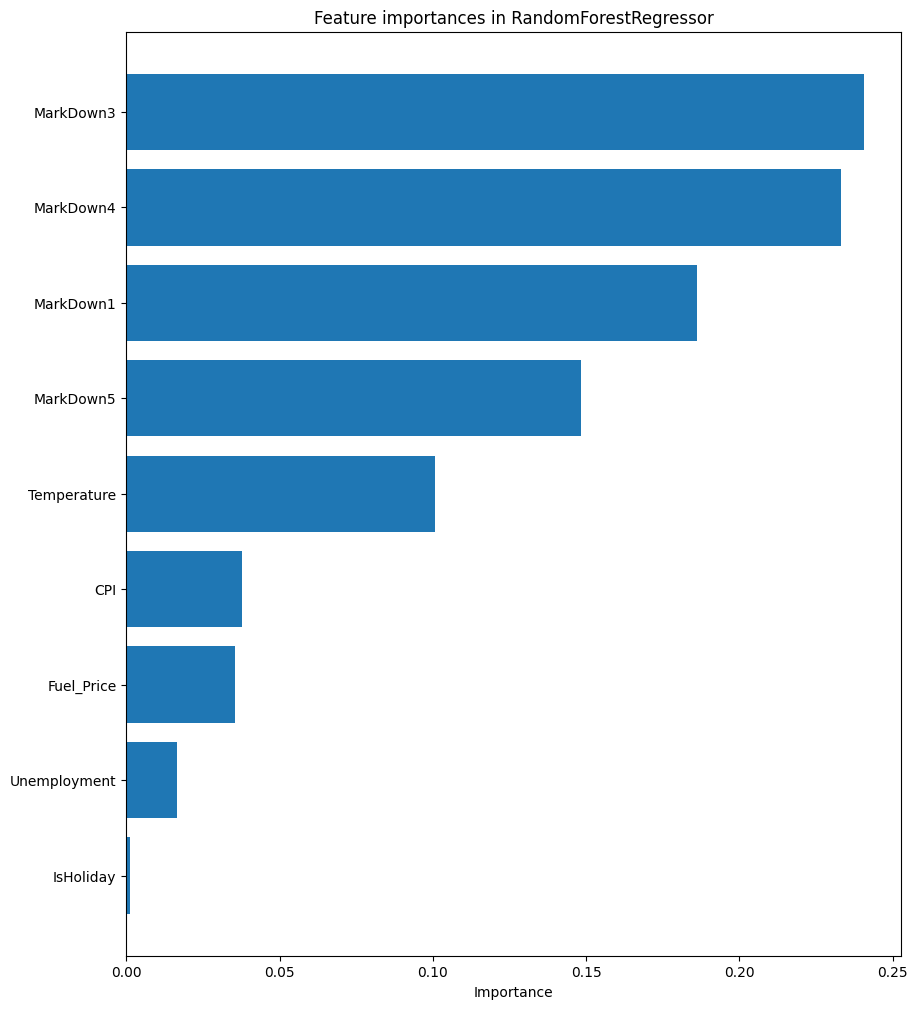

In [12]:
import matplotlib.pyplot as plt

feature_importance = classifier.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances in RandomForestRegressor')
plt.show()

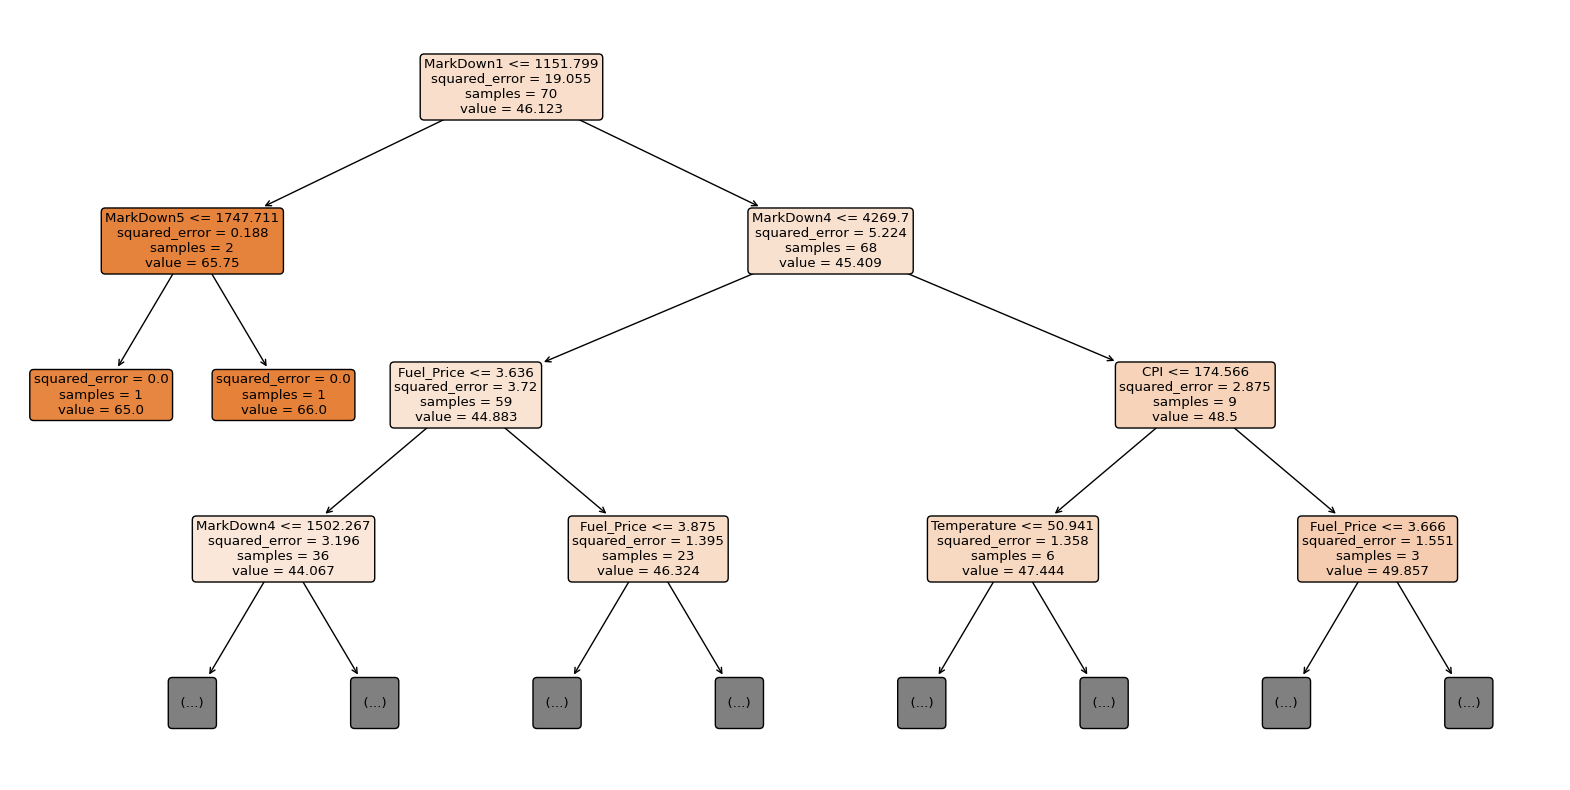

In [13]:
from sklearn.tree import plot_tree

# Plotting one tree from the forest
plt.figure(figsize=(20,10))
plot_tree(classifier.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True, max_depth=3)
plt.show()

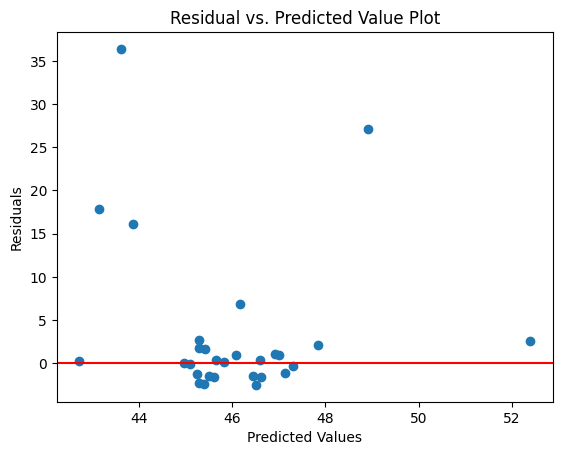

In [14]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted Value Plot')
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_rf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.732413793103449
Mean Squared Error: 101.71230344827588
R-squared: -0.2707616127402914


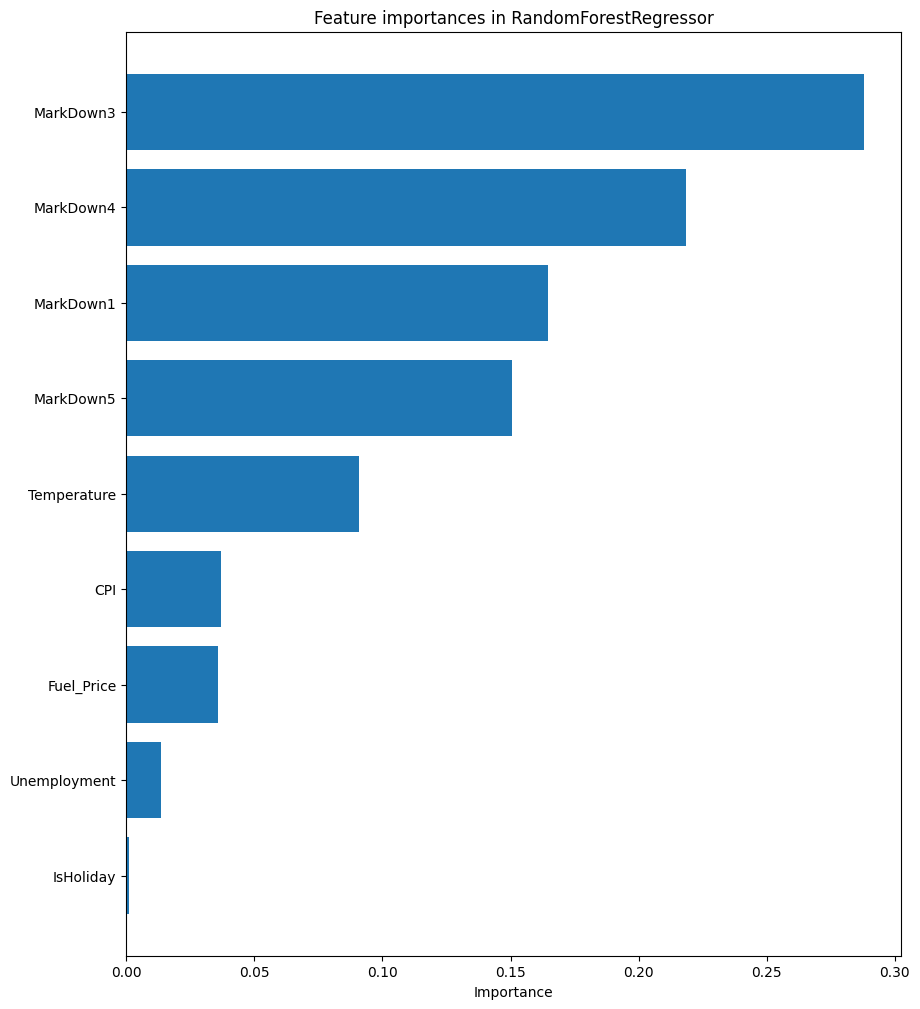

In [17]:
feature_importance = best_rf.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(X_train.shape[1]), feature_importance[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances in RandomForestRegressor')
plt.show()

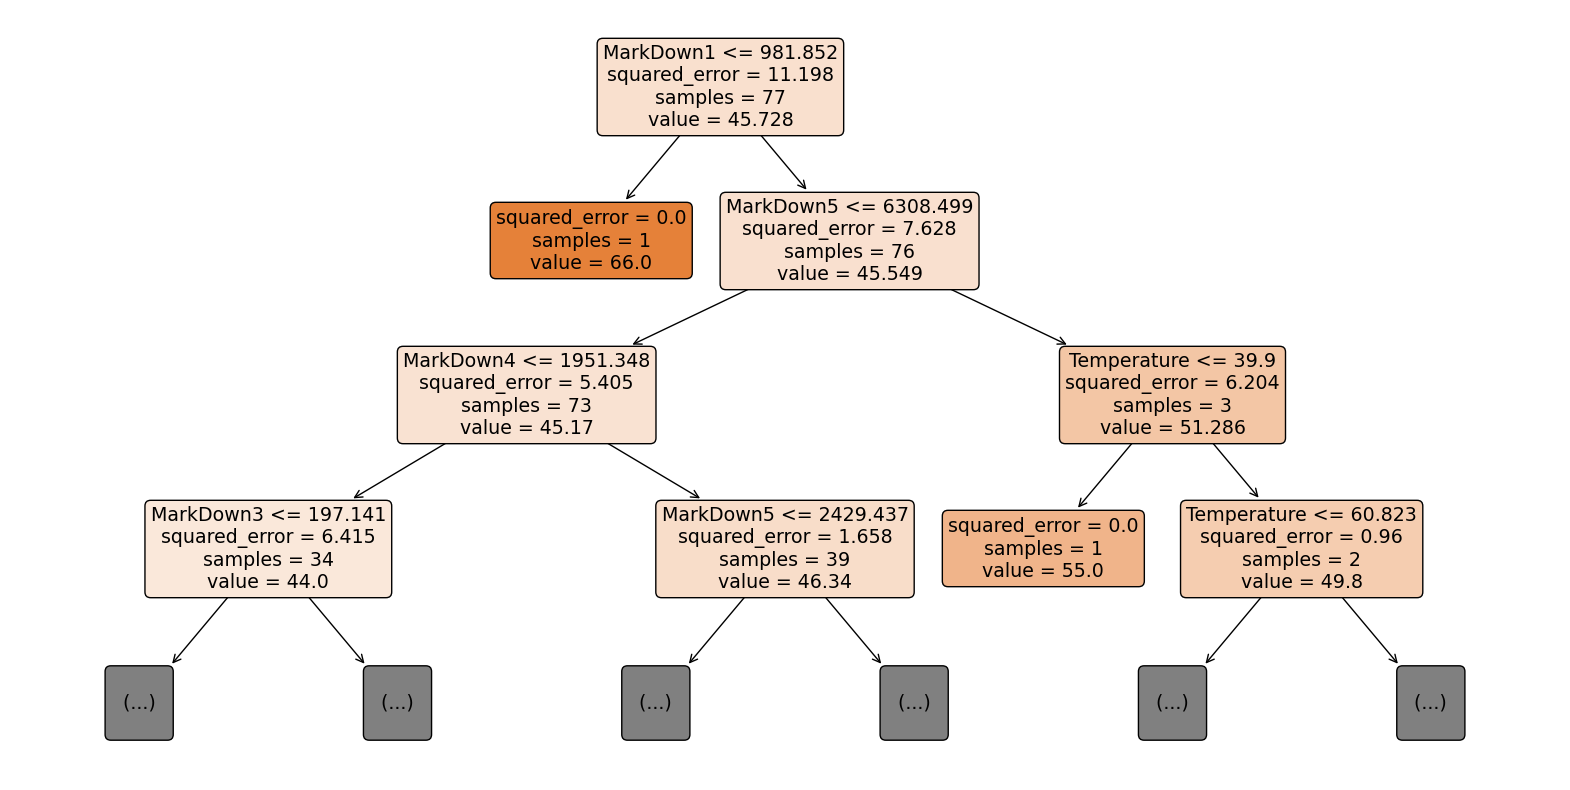

In [18]:
from sklearn.tree import plot_tree

# Plotting one tree from the forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True, max_depth=3)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [51]:
print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)


     Temperature  Fuel_Price         CPI  Unemployment  IsHoliday   
96     38.209111    3.361756  173.627726      7.804222          0  \
40     50.399778    2.872911  168.654208      8.475289          0   
29     76.737333    2.763200  168.228795      8.428578          0   
128    78.776444    3.501267  175.673522      7.237333          0   
119    67.638222    3.834422  175.627335      7.419533          0   
..           ...         ...         ...           ...        ...   
17     73.410889    2.808800  167.915336      8.497711          0   
9      58.420667    2.853089  167.718340      8.497711          0   
123    75.046444    3.644867  175.588202      7.419533          0   
0      34.037333    2.717844  167.730885      8.619311          0   
82     79.296222    3.651467  172.039510      8.097489          0   

        MarkDown1   MarkDown3     MarkDown4    MarkDown5  
96    4701.481667  318.995556   2656.652162  9253.281556  
40    8960.406333  177.023837   2887.621558  4121.106

In [45]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [54]:
print(X_train_scaled)
print(X_test_scaled)
print(_train_scaled)
print(X_train_scaled)



[[-1.49832481  0.03108958  0.68990192 ... -0.11390817 -0.16097221
   2.61757292]
 [-0.69593087 -1.11250312 -0.92037902 ... -0.13119162 -0.11416185
   0.01862703]
 [ 1.03761624 -1.36915905 -1.05811546 ... -0.14485952  0.02893196
   0.18601271]
 ...
 [ 0.92632134  0.69339392  1.32464728 ... -0.14680491 -0.29337316
  -0.10226282]
 [-1.77291268 -1.47526291 -1.21932429 ... -0.12847668  4.31517812
   0.05117559]
 [ 1.2060432   0.70883383  0.17568352 ... -0.14577947  0.56186583
  -0.20078869]]
[[-1.31031264 -0.03472497  0.72733184 -0.41575376 -0.29277002 -0.74023734
  -0.0668771  -0.57449635 -0.09605162]
 [ 0.67537029 -1.43440174 -1.04905713  0.86050171 -0.29277002 -0.05257778
  -0.15013712 -0.41102429  0.83861123]
 [ 1.0636811  -1.29824985 -1.13798778  0.86050171 -0.29277002 -0.51593452
  -0.15126799 -0.22466243  0.12585824]
 [-0.82271549 -1.22666484 -1.17760757  1.25038286 -0.29277002 -0.19162401
  -0.09993288 -0.39917924 -0.83610297]
 [-0.26135567  1.44277517  1.26683597 -1.20210266 -0.292

NameError: name '_train_scaled' is not defined

In [55]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [47]:
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

print('Mean Absolute Error:', mean_absolute_error(y_test_original, y_pred_original))
print('Mean Squared Error:', mean_squared_error(y_test_original, y_pred_original))
print('R-squared:', r2_score(y_test_original, y_pred_original))


Mean Absolute Error: 5.2999325592067414
Mean Squared Error: 107.92749813720845
R-squared: -0.34841230551433977


In [43]:
y_pred = lr.predict(X_test_scaled)

print('Mean Absolute Error:', mean_absolute_error(y_test_scaled, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_scaled, y_pred))
print('R-squared:', r2_score(y_test_scaled, y_pred))

Mean Absolute Error: 1.4598915664009628
Mean Squared Error: 8.189033026378643
R-squared: -0.3484123055143402
